In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from agents.pgp.pgp_softmax import SoftMaxPGP
from environments.mutantworlds.mutantworld import freeze_mutant_world
from environments.mutantworlds.mutantworlds_foster import FosterWorld
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from plots.agent_plotter import AgentPlotter

from matplotlib import pyplot as plt

In [3]:
# maze parameters
edge_width=3
goal_reward=100
doors_cost=-100
inner_pillars_cost=-100
outer_pillars_cost=-0
wall_cost=-25
pillars_as_cost=False

# training parameters
training_steps = 100
alpha = .1

In [4]:

maze_small = FosterWorld(goal_reward=goal_reward, doors_cost=doors_cost, pillars_as_cost=pillars_as_cost, small_version=True)
maze_medium = FosterWorld(goal_reward=goal_reward, doors_cost=doors_cost, pillars_as_cost=pillars_as_cost, small_version=False)

bot_small = SoftMaxPGP(maze_small)
bot_medium = SoftMaxPGP(maze_medium)

viz_small = GridWorldVisualizer(maze_small, bot_small)
viz_medium = GridWorldVisualizer(maze_medium, bot_medium)


/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


100%|██████████| 100/100 [00:00<00:00, 714.12it/s]


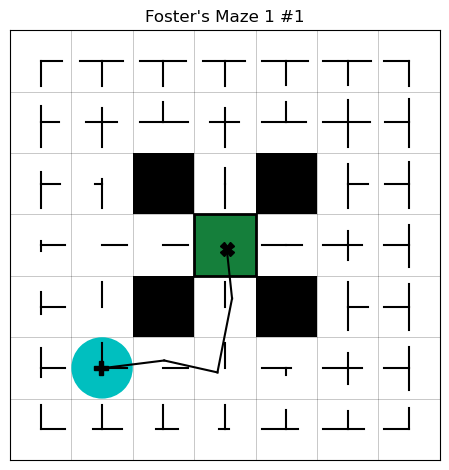

100%|██████████| 100/100 [00:00<00:00, 460.38it/s]


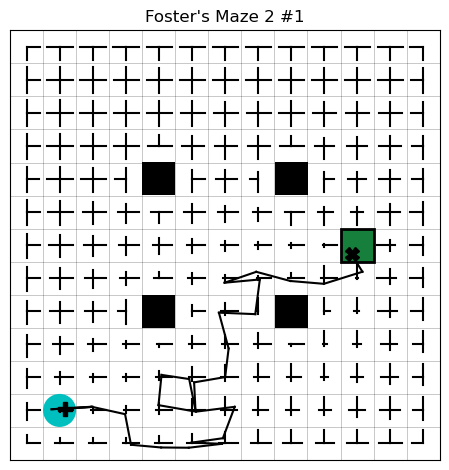

100%|██████████| 100/100 [00:00<00:00, 642.38it/s]


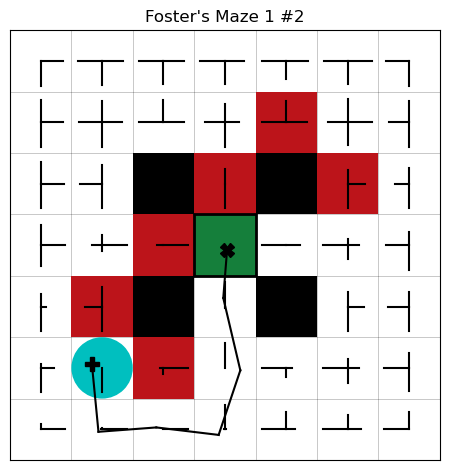

100%|██████████| 100/100 [00:00<00:00, 468.40it/s]


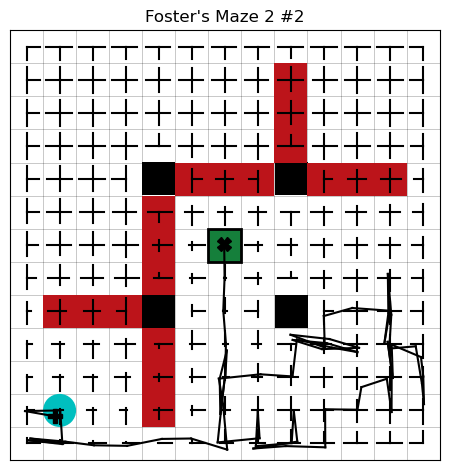

100%|██████████| 100/100 [00:00<00:00, 690.10it/s]


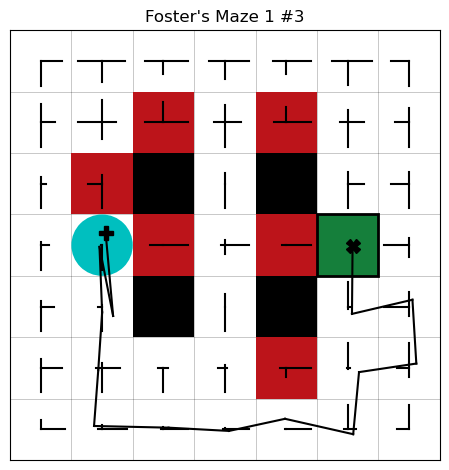

100%|██████████| 100/100 [00:00<00:00, 427.22it/s]


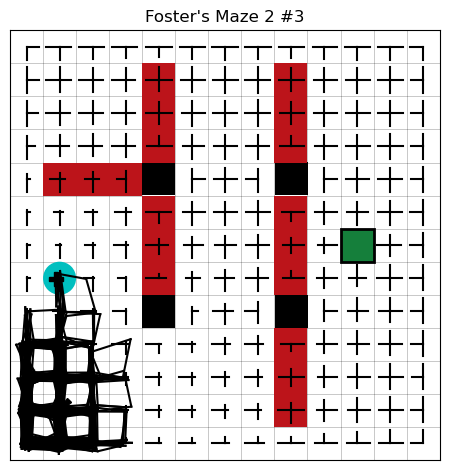

100%|██████████| 100/100 [00:00<00:00, 822.56it/s]


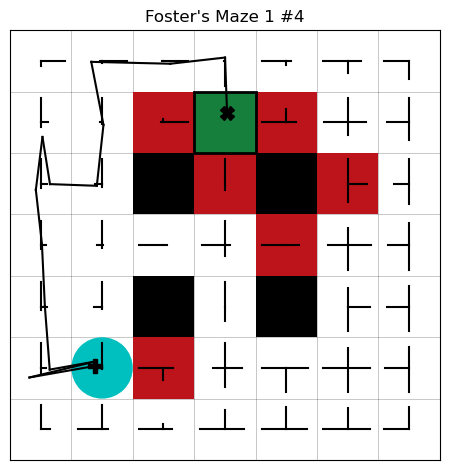

100%|██████████| 100/100 [00:00<00:00, 453.75it/s]


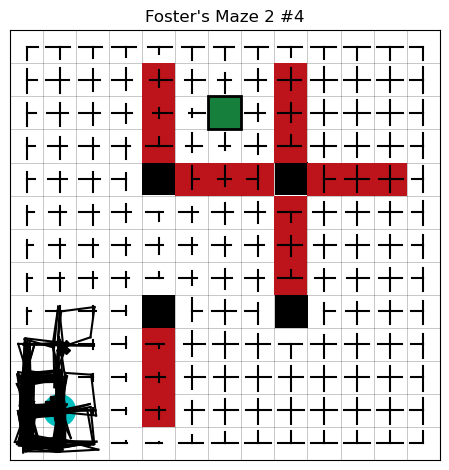

100%|██████████| 100/100 [00:00<00:00, 748.73it/s]


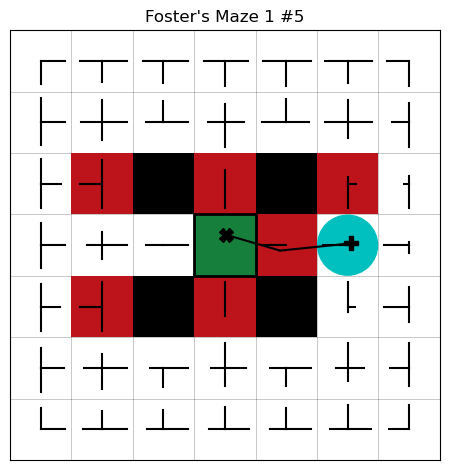

100%|██████████| 100/100 [00:00<00:00, 482.97it/s]


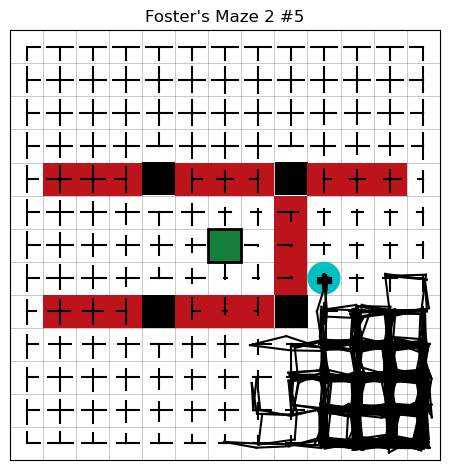

100%|██████████| 100/100 [00:00<00:00, 799.63it/s]


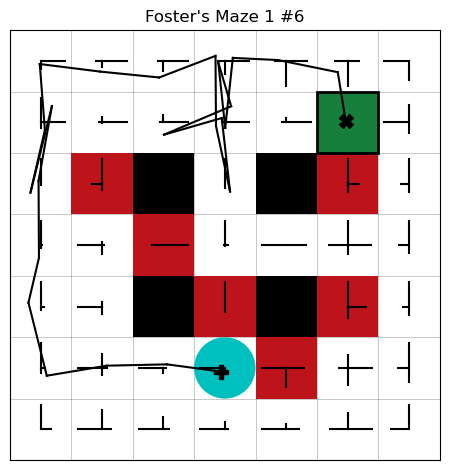

100%|██████████| 100/100 [00:00<00:00, 492.39it/s]


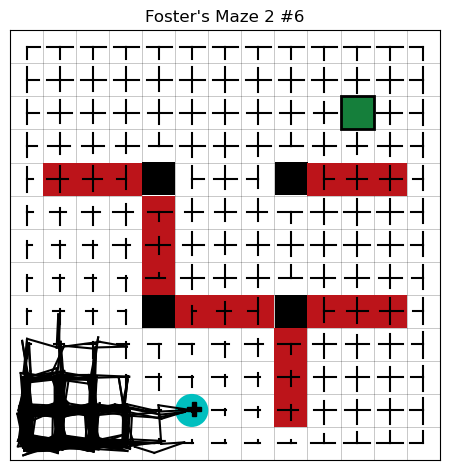

100%|██████████| 100/100 [00:00<00:00, 747.96it/s]


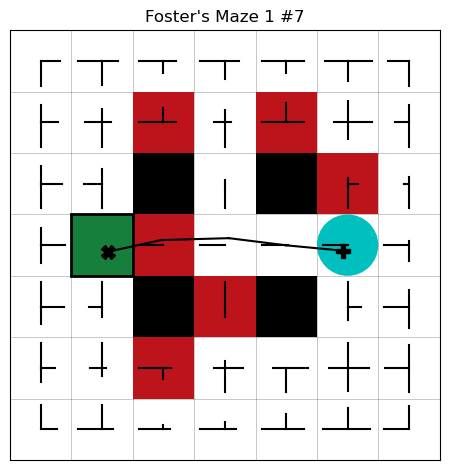

100%|██████████| 100/100 [00:00<00:00, 438.85it/s]


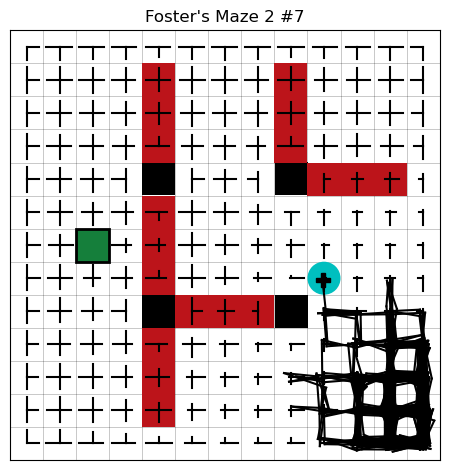

100%|██████████| 100/100 [00:00<00:00, 808.44it/s]


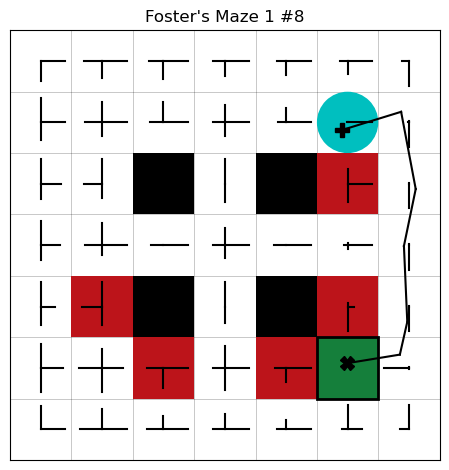

100%|██████████| 100/100 [00:00<00:00, 303.53it/s]


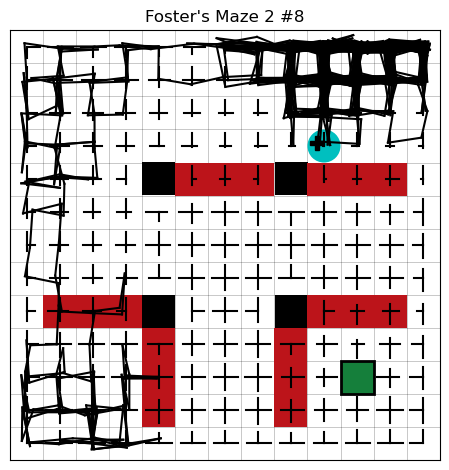

100%|██████████| 100/100 [00:00<00:00, 403.06it/s]


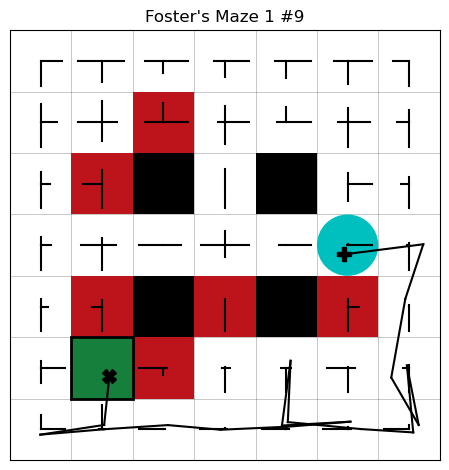

100%|██████████| 100/100 [00:00<00:00, 443.17it/s]


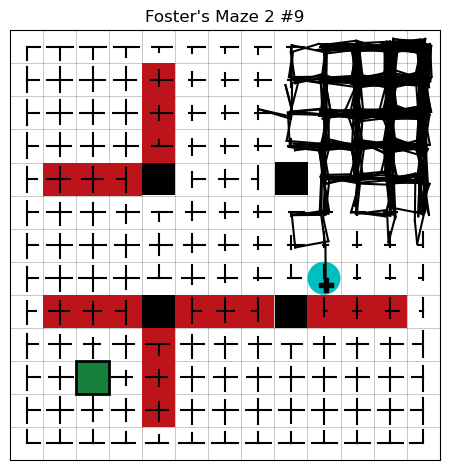

100%|██████████| 100/100 [00:00<00:00, 791.96it/s]


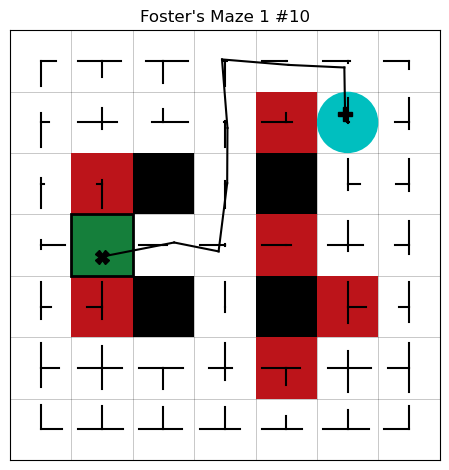

100%|██████████| 100/100 [00:00<00:00, 365.75it/s]


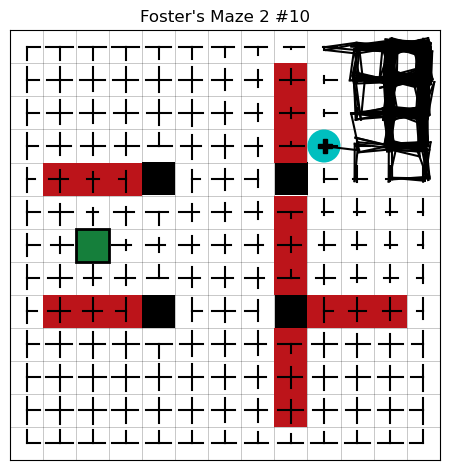

In [5]:
mazes = [maze_small, maze_medium]
vizs = [viz_small, viz_medium]
agents = [bot_small, bot_medium]

# plot the different maze configurations:
for i in range(mazes[0].n_mutations):

    for j in range(len(mazes)):
        m = mazes[j]
        v =  vizs[j]
        a = agents[j]
        
        # change the configuration of the maze
        m.mutate(i)
           
        # Reset the policy and the starting position
        a.reset()

        # Training
        a.learn(n_steps=training_steps, alpha=alpha)
        
        v.plot_policy(plot_axis=False)
        v.plot_trajectory(plot_maze=False, plot_axis=False)
        plt.title("Foster's Maze {} #{}".format(j+1, i+1))

        plt.tight_layout()
        plt.show()